# Modelling Human Activity from Smartphone Data

## Dataset

The dataset [A public domain dataset for human activity recognition using smartphone](https://upcommons.upc.edu/handle/2117/20897) is from the paper [Human Activity Recognition on Smartphones Using a Multiclass Hardware-Friendly Support Vector Machine](https://link.springer.com/chapter/10.1007/978-3-642-35395-6_30)



## Data Download

- [Kaggle](https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones)
- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading data
train_data = pd.read_csv('files/HAR/train.csv')
test_data = pd.read_csv('files/HAR/test.csv')

In [3]:
# checking shape
print("train_data shape: ", train_data.shape)
print("test_data shape: ", test_data.shape)

train_data shape:  (7352, 563)
test_data shape:  (2947, 563)


In [4]:
# Checking any null values in train and test data
print("Null values in train_data: ", train_data.isnull().values.any())
print("Null values in test data: ", test_data.isnull().values.any())

Null values in train_data:  False
Null values in test data:  False


In [5]:
# checking first few rows of train dataframe
print(train_data.head())

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

In [6]:
# checking columns
print(train_data.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [7]:
# checking the dependent variable (to be predicted)
print(train_data['Activity'])

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
5               STANDING
6               STANDING
7               STANDING
8               STANDING
9               STANDING
10              STANDING
11              STANDING
12              STANDING
13              STANDING
14              STANDING
15              STANDING
16              STANDING
17              STANDING
18              STANDING
19              STANDING
20              STANDING
21              STANDING
22              STANDING
23              STANDING
24              STANDING
25              STANDING
26              STANDING
27               SITTING
28               SITTING
29               SITTING
              ...       
7322    WALKING_UPSTAIRS
7323    WALKING_UPSTAIRS
7324    WALKING_UPSTAIRS
7325    WALKING_UPSTAIRS
7326    WALKING_UPSTAIRS
7327    WALKING_UPSTAIRS
7328    WALKING_UPSTAIRS
7329    WALKING_UPSTAIRS
7330    WALKING_UPSTAIRS


In [8]:
# checking unique set of activities in dataset
print(set(train_data['Activity']))

{'STANDING', 'WALKING', 'WALKING_UPSTAIRS', 'SITTING', 'WALKING_DOWNSTAIRS', 'LAYING'}


In [9]:
# Split into data and labels
X_train = train_data.drop(columns=['Activity', 'subject'])
y_train = train_data['Activity']
X_test = test_data.drop(columns=['Activity', 'subject'])
y_test = test_data['Activity']

In [10]:
# checking split data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (7352, 561)
y_train shape:  (7352,)
X_test shape:  (2947, 561)
y_test shape:  (2947,)


([<matplotlib.patches.Wedge at 0x22d1e213ef0>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

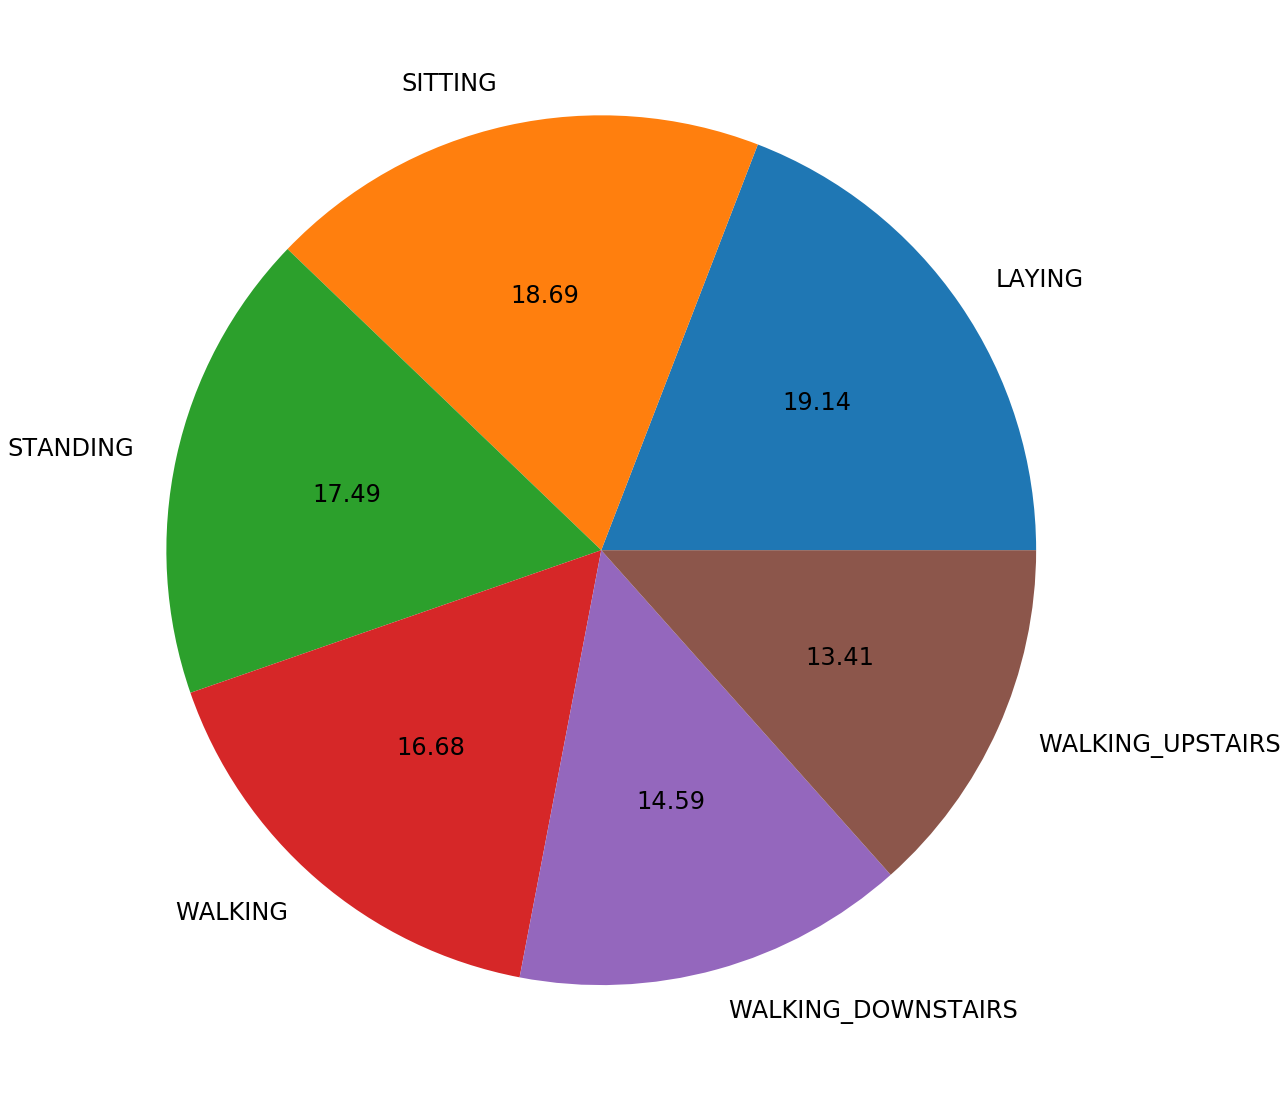

In [11]:
# Visualising distribution of activities in training set 
count_each_activity = np.array(y_train.value_counts())

# sorting unique activities in order
activities = sorted(y_train.unique())

# Pie chart
plt.rcParams.update({'figure.figsize': [20, 20], 'font.size': 24})
plt.pie(count_each_activity, labels = activities, autopct = '%0.2f')

In [12]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression()

# fitting the model
logisticRegression.fit(X_train, y_train)

C:\Users\44798075\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\44798075\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
# Predicting on train and test data
y_pred_train = logisticRegression.predict(X_train)
y_pred_test = logisticRegression.predict(X_test)

In [14]:
# importing evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [15]:
# Evaluation on train data
print("acc score on train data: ", accuracy_score(y_train, y_pred_train))
print("\n")
print(confusion_matrix(y_train, y_pred_train))

acc score on train data:  0.9908868335146899


[[1407    0    0    0    0    0]
 [   0 1253   33    0    0    0]
 [   0   33 1341    0    0    0]
 [   0    0    0 1225    0    1]
 [   0    0    0    0  986    0]
 [   0    0    0    0    0 1073]]


In [16]:
# Evaluation on test data
print("acc score on test data: ", accuracy_score(y_test, y_pred_test))
print("\n")
print(confusion_matrix(y_test, y_pred_test))

acc score on test data:  0.9619952494061758


[[537   0   0   0   0   0]
 [  0 432  55   0   0   4]
 [  0  13 517   2   0   0]
 [  0   0   0 494   2   0]
 [  0   0   0   4 407   9]
 [  0   0   0  23   0 448]]
